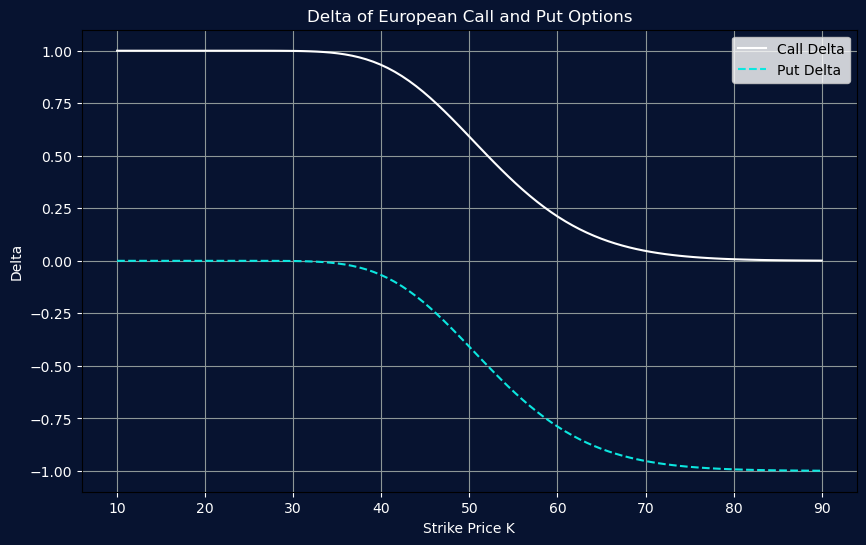

In [19]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the Black-Scholes formula for a European call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Define the formula for calculating the delta of a call option
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Define the delta of a European put option using the put-call parity relationship
def delta_put(S, K, T, r, sigma):
    return delta_call(S, K, T, r, sigma) - 1

# Parameters
S = 50        # Underlying asset price
K_range = np.linspace(10, 90, 100)  # Range of strike prices
T = 0.5       # Time to maturity
r = 0.05      # Risk-free rate
sigma = 0.25   # Volatility


fig_background_color = '#071330'  # Dark blue
plot_background_color = '#071330'  # Dark blue
text_color = 'white'
grid_color = '#8D9797'  # Light grey for visibility

# Define a list of colors for the lines
line_colors = ['white', '#0CE6DF', '#0000FF', 'blue', 'red']

# Calculate and plot the deltas for the European call and put options
call_deltas = [delta_call(S, K, T, r, sigma) for K in K_range]
put_deltas = [delta_put(S, K, T, r, sigma) for K in K_range]

# Create the figure and axes, setting the background colors
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_facecolor(plot_background_color)
plt.gcf().set_facecolor(fig_background_color)
plt.plot(K_range, call_deltas, label='Call Delta', color=line_colors[0])
plt.plot(K_range, put_deltas, label='Put Delta', linestyle='--', color=line_colors[1])
plt.title('Delta of European Call and Put Options', color=text_color)
plt.xlabel('Strike Price K', color=text_color)
plt.ylabel('Delta', color=text_color)
legend = plt.legend()
legend = plt.legend(facecolor=plot_background_color, edgecolor=text_color)
for text in legend.get_texts():
    text.set_color(text_color)       
plt.grid(True, color=grid_color)
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)
plt.show()